<a href="https://colab.research.google.com/github/AbrilMartinez18/Actividad1/blob/main/A01734613_ACT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ACTIVIDAD 1**
LISTINGS- MEXICO AIRBNB

---
**Nombre:** Abril Lizeth Martínez Salas
--

**Matricula:** A01734613




In [3]:
import pandas as pd
from pandas import DataFrame as df 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("listings.csv")

In [5]:
df = df[['host_acceptance_rate','review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365','review_scores_communication','number_of_reviews','room_type']]

In [6]:
df.head()

,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,number_of_reviews,room_type
0,NaN,NaN,"$4,001.00",NaN,363,NaN,0,Entire home/apt
1,100%,4.96,$500.00,4.93,363,4.93,27,Private room
2,67%,4.73,$599.00,4.70,323,4.91,144,Private room
3,79%,4.59,"$18,000.00",4.70,331,4.75,58,Entire home/apt
4,100%,4.85,$740.00,4.80,314,4.95,61,Entire home/apt


In [7]:
df.dtypes

host_acceptance_rate            object
review_scores_rating           float64
price                           object
review_scores_cleanliness      float64
availability_365                 int64
review_scores_communication    float64
number_of_reviews                int64
room_type                       object
dtype: object

In [8]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [9]:
df.head()

,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,number_of_reviews,room_type
0,NaN,NaN,4001.00,NaN,363,NaN,0,Entire home/apt
1,100,4.96,500.00,4.93,363,4.93,27,Private room
2,67,4.73,599.00,4.70,323,4.91,144,Private room
3,79,4.59,18000.00,4.70,331,4.75,58,Entire home/apt
4,100,4.85,740.00,4.80,314,4.95,61,Entire home/apt


In [10]:
df['host_acceptance_rate']=df['host_acceptance_rate'].astype({'host_acceptance_rate': 'float64'})
df['price']=df['price'].astype({'price': 'float64'})

In [11]:
df.dtypes

host_acceptance_rate           float64
review_scores_rating           float64
price                          float64
review_scores_cleanliness      float64
availability_365                 int64
review_scores_communication    float64
number_of_reviews                int64
room_type                       object
dtype: object

In [12]:
df.shape

(22948, 8)

##**SEPARAR POR TIPO DE HABITACIÓN**

In [13]:
#1.PRIVATE ROOM
PR=df[df['room_type']=='Private room']

#2.ENTIRE HOME/APT
FP=df[df['room_type']=='Entire home/apt']

#3 SHARED ROOM
SR=df[df['room_type']=='Shared room']

1. PRIVATE ROOM

In [14]:
PR=PR[['host_acceptance_rate','review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365','review_scores_communication','number_of_reviews']]

**CONTAR NULOS** 

In [15]:
valores_nulos=PR.isnull().sum()
print(valores_nulos)

host_acceptance_rate           1319
review_scores_rating           2203
price                             0
review_scores_cleanliness      2258
availability_365                  0
review_scores_communication    2257
number_of_reviews                 0
dtype: int64


**REEMPLAZAR VALORES**

In [16]:
#remplazar valores
from numpy import nan as NaN
PR=PR.fillna({'host_acceptance_rate':float(PR['host_acceptance_rate'].mean())})
PR=PR.fillna({'review_scores_rating':float(PR['review_scores_rating'].mean())})
PR=PR.fillna({'review_scores_cleanliness':float(PR['review_scores_cleanliness'].mean())})
PR=PR.fillna({'review_scores_communication':float(PR['review_scores_communication'].mean())})
PR=PR.fillna({'number_of_reviews':float(PR['number_of_reviews'].mean())})
PR=PR.fillna({'price':float(PR['price'].mean())})


In [17]:
valores_nulos=PR.isnull().sum()
print(valores_nulos)

host_acceptance_rate           0
review_scores_rating           0
price                          0
review_scores_cleanliness      0
availability_365               0
review_scores_communication    0
number_of_reviews              0
dtype: int64


**OUTLIERS**

In [18]:
y=PR

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate            123.273903
review_scores_rating              5.459467
price                          1358.125000
review_scores_cleanliness         5.453192
availability_365                679.000000
review_scores_communication       5.348946
number_of_reviews                50.000000
dtype: float64
Limite inferior permitido host_acceptance_rate            61.210161
review_scores_rating             4.154222
price                         -262.875000
review_scores_cleanliness        4.244681
availability_365              -169.000000
review_scores_communication      4.418423
number_of_reviews              -30.000000
dtype: float64


In [19]:
#Obtenemos datos limpios del Dataframe (Con esta acción los outliers se convierten en datos nulos "NaN")
PR=PR[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

In [20]:
valores_nulos=PR.isnull().sum()
print(valores_nulos)

host_acceptance_rate           1038
review_scores_rating            553
price                           816
review_scores_cleanliness       558
availability_365                  0
review_scores_communication     516
number_of_reviews               962
dtype: int64


In [21]:
PR=PR.fillna({'host_acceptance_rate':float(PR['host_acceptance_rate'].mean())})
PR=PR.fillna({'price':float(PR['price'].mean())})
PR=PR.fillna({'number_of_reviews':float(PR['number_of_reviews'].mean())})

**CORRELACIONES**

In [22]:
PR.corr()

,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,number_of_reviews
host_acceptance_rate,1.000000,0.016301,0.031620,0.040014,0.045761,0.033027,0.133364
review_scores_rating,0.016301,1.000000,-0.015458,0.719434,-0.134115,0.717947,0.112659
price,0.031620,-0.015458,1.000000,0.054480,0.074250,-0.030563,-0.046266
review_scores_cleanliness,0.040014,0.719434,0.054480,1.000000,-0.089045,0.593570,0.067370
availability_365,0.045761,-0.134115,0.074250,-0.089045,1.000000,-0.109227,-0.090449
review_scores_communication,0.033027,0.717947,-0.030563,0.593570,-0.109227,1.000000,0.114794
number_of_reviews,0.133364,0.112659,-0.046266,0.067370,-0.090449,0.114794,1.000000


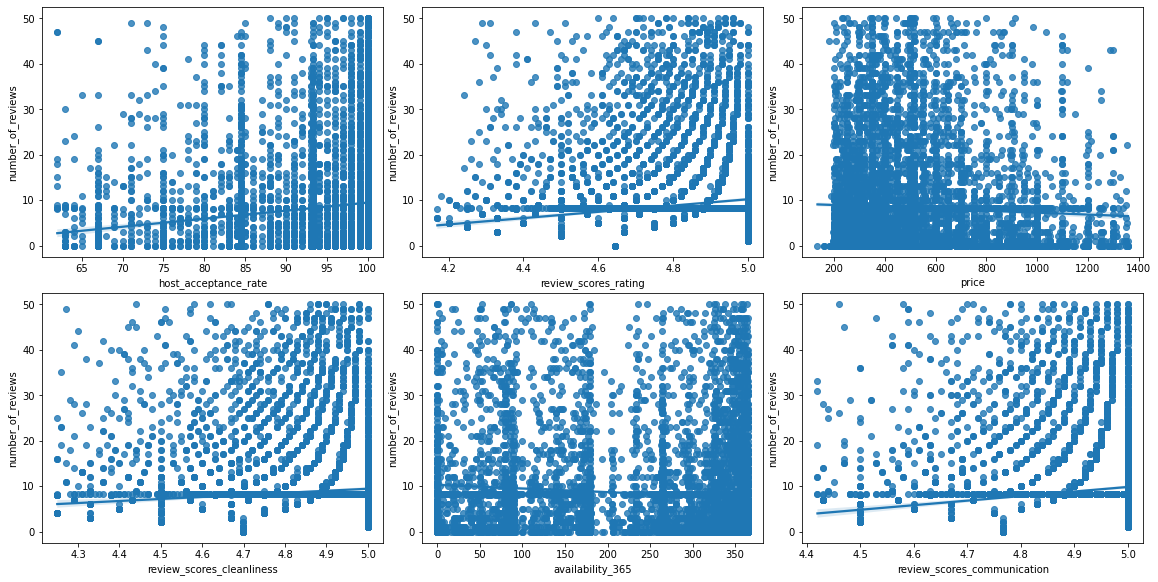

In [23]:
column_sels=['host_acceptance_rate','review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365','review_scores_communication']
x=PR.loc[:,column_sels]#variables explicativas

y=PR['number_of_reviews']#target, variable dependiente

fig, axs=plt.subplots(ncols=3,nrows=2,figsize=(16,8))

#index=0

axs=axs.flatten()
for i, k in enumerate(column_sels):
  sns.regplot(x=x[k],y=y,data=PR,ax=axs[i])
  plt.tight_layout(pad=0.4)

In [24]:
corr=PR.corrwith(PR['number_of_reviews'])
corr

host_acceptance_rate           0.133364
review_scores_rating           0.112659
price                         -0.046266
review_scores_cleanliness      0.067370
availability_365              -0.090449
review_scores_communication    0.114794
number_of_reviews              1.000000
dtype: float64

In [25]:
#COEFICIENTE DE DETERMINACIÓN R^2
coef_deter=pow(corr,2)
coef_deter

host_acceptance_rate           0.017786
review_scores_rating           0.012692
price                          0.002140
review_scores_cleanliness      0.004539
availability_365               0.008181
review_scores_communication    0.013178
number_of_reviews              1.000000
dtype: float64

**Selección de mejor modelo considerando el coeficiente de correlación**

---

Habitación privada
---
No. of reviews vs. Host_acceptance_rate


In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
type(model)
Vars_Indep=PR[['host_acceptance_rate']]
Var_Dep=PR['number_of_reviews']
model.fit(X=Vars_Indep,y=Var_Dep)
y_pred=model.predict(X=PR[['host_acceptance_rate']])
y_pred

array([9.4359322 , 3.59926135, 5.72168711, ..., 9.4359322 , 8.90532576,
       6.69164711])

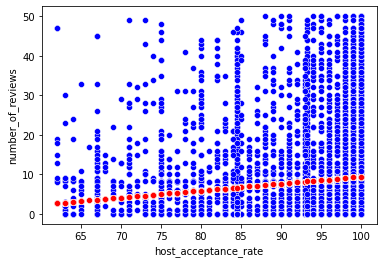

In [27]:
real=sns.scatterplot(x='host_acceptance_rate',y='number_of_reviews', color="blue",data=PR)
pred=sns.scatterplot(x='host_acceptance_rate',y=y_pred,color='red',data=PR)

##2. ENTIRE HOME/APT

In [28]:
FP=FP[['host_acceptance_rate','review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365','review_scores_communication','number_of_reviews']]

In [29]:
valores_nulos=FP.isnull().sum()
print(valores_nulos)

host_acceptance_rate           1068
review_scores_rating           1693
price                             0
review_scores_cleanliness      1727
availability_365                  0
review_scores_communication    1728
number_of_reviews                 0
dtype: int64


In [30]:
FP=FP.fillna({'host_acceptance_rate':float(FP['host_acceptance_rate'].mean())})
FP=FP.fillna({'review_scores_rating':float(FP['review_scores_rating'].mean())})
FP=FP.fillna({'review_scores_cleanliness':float(FP['review_scores_cleanliness'].mean())})
FP=FP.fillna({'review_scores_communication':float(FP['review_scores_communication'].mean())})

**OUTLIERS**

In [31]:
y=FP

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate            110.500000
review_scores_rating              5.285000
price                          3242.500000
review_scores_cleanliness         5.285000
availability_365                662.500000
review_scores_communication       5.237749
number_of_reviews               115.500000
dtype: float64
Limite inferior permitido host_acceptance_rate            82.500000
review_scores_rating             4.365000
price                         -665.500000
review_scores_cleanliness        4.445000
availability_365              -181.500000
review_scores_communication      4.603751
number_of_reviews              -64.500000
dtype: float64


In [32]:
FP=FP[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

In [33]:
valores_nulos=FP.isnull().sum()
print(valores_nulos)

host_acceptance_rate           1510
review_scores_rating            899
price                          1002
review_scores_cleanliness      1057
availability_365                  0
review_scores_communication    1147
number_of_reviews              1334
dtype: int64


In [34]:
FP=FP.fillna({'host_acceptance_rate':float(FP['host_acceptance_rate'].mean())})
FP=FP.fillna({'review_scores_rating':float(FP['review_scores_rating'].mean())})
FP=FP.fillna({'price':float(FP['price'].mean())})
FP=FP.fillna({'review_scores_cleanliness':float(FP['review_scores_cleanliness'].mean())})
FP=FP.fillna({'review_scores_communication':float(FP['review_scores_communication'].mean())})
FP=FP.fillna({'number_of_reviews':float(FP['number_of_reviews'].mean())})

**CORRELACIONES FP**

In [35]:
FP.corr()

,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,number_of_reviews
host_acceptance_rate,1.000000,0.011759,0.040424,0.049466,0.078292,0.012676,0.073297
review_scores_rating,0.011759,1.000000,0.112231,0.566030,-0.093488,0.548771,-0.077706
price,0.040424,0.112231,1.000000,0.102034,0.041327,0.043476,-0.058850
review_scores_cleanliness,0.049466,0.566030,0.102034,1.000000,-0.030611,0.416427,-0.088539
availability_365,0.078292,-0.093488,0.041327,-0.030611,1.000000,-0.098912,-0.072587
review_scores_communication,0.012676,0.548771,0.043476,0.416427,-0.098912,1.000000,-0.081994
number_of_reviews,0.073297,-0.077706,-0.058850,-0.088539,-0.072587,-0.081994,1.000000


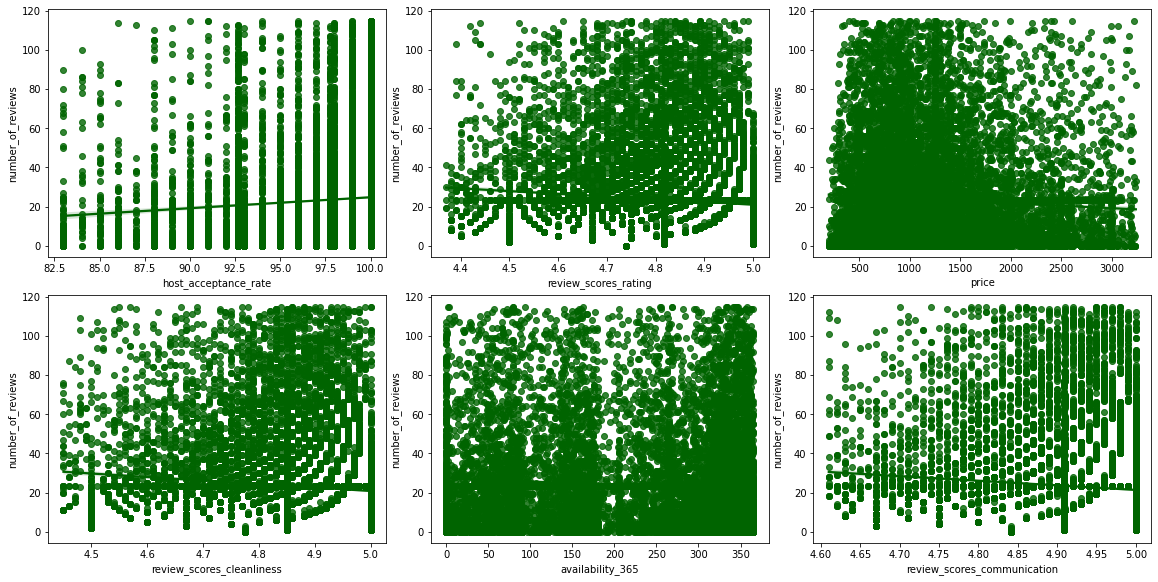

In [36]:
column_sels=['host_acceptance_rate','review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365','review_scores_communication']
x=FP.loc[:,column_sels]#variables explicativas

y=FP['number_of_reviews']#target, variable dependiente

fig, axs=plt.subplots(ncols=3,nrows=2,figsize=(16,8))
axs=axs.flatten()
for i, k in enumerate(column_sels):
  sns.regplot(x=x[k],y=y,data=FP,ax=axs[i],color='darkgreen')
  plt.tight_layout(pad=0.4)

In [37]:
corr=FP.corrwith(FP['number_of_reviews'])
corr

host_acceptance_rate           0.073297
review_scores_rating          -0.077706
price                         -0.058850
review_scores_cleanliness     -0.088539
availability_365              -0.072587
review_scores_communication   -0.081994
number_of_reviews              1.000000
dtype: float64

In [38]:
#COEFICIENTE DE DETERMINACIÓN R^2
coef_deter=pow(corr,2)
coef_deter

host_acceptance_rate           0.005372
review_scores_rating           0.006038
price                          0.003463
review_scores_cleanliness      0.007839
availability_365               0.005269
review_scores_communication    0.006723
number_of_reviews              1.000000
dtype: float64

**Selección de mejor modelo considerando el coeficiente de correlación**

---


HABITACIÓN/DEPTO COMPLETO

---
No. of reviews vs. Host_acceptance_rate


In [39]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
type(model)
Vars_Indep=FP[['host_acceptance_rate']]
Var_Dep=FP['number_of_reviews']
model.fit(X=Vars_Indep,y=Var_Dep)
y_pred=model.predict(X=FP[['host_acceptance_rate']])
y_pred

array([20.60411519, 23.46214018, 24.71911496, ..., 24.71911496,
       24.16009903, 24.16009903])

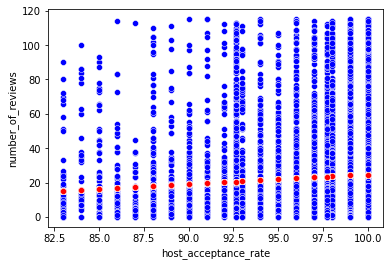

In [40]:
real=sns.scatterplot(x='host_acceptance_rate',y='number_of_reviews', color="blue",data=FP)
pred=sns.scatterplot(x='host_acceptance_rate',y=y_pred,color='red',data=FP)

##**3. SHARED ROOM (HAB.COMPARTIDA)**

In [41]:
SR=SR[['host_acceptance_rate','review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365','review_scores_communication','number_of_reviews']]

In [42]:
valores_nulos=SR.isnull().sum()
print(valores_nulos)

host_acceptance_rate            72
review_scores_rating           139
price                            0
review_scores_cleanliness      143
availability_365                 0
review_scores_communication    143
number_of_reviews                0
dtype: int64


In [43]:
SR=SR.fillna({'host_acceptance_rate':float(SR['host_acceptance_rate'].mean())})
SR=SR.fillna({'review_scores_rating':float(SR['review_scores_rating'].mean())})
SR=SR.fillna({'review_scores_cleanliness':float(SR['review_scores_cleanliness'].mean())})
SR=SR.fillna({'review_scores_communication':float(SR['review_scores_communication'].mean())})

In [44]:
y=SR

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate           127.533333
review_scores_rating             5.786429
price                          938.000000
review_scores_cleanliness        5.396985
availability_365               642.500000
review_scores_communication      5.483920
number_of_reviews               11.875000
dtype: float64
Limite inferior permitido host_acceptance_rate            54.111111
review_scores_rating             3.689286
price                         -220.000000
review_scores_cleanliness        4.045025
availability_365               -97.500000
review_scores_communication      4.193467
number_of_reviews               -7.125000
dtype: float64


In [45]:
SR=SR[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

In [46]:
valores_nulos=SR.isnull().sum()
print(valores_nulos)

host_acceptance_rate           49
review_scores_rating           23
price                          40
review_scores_cleanliness      32
availability_365                0
review_scores_communication    20
number_of_reviews              50
dtype: int64


In [47]:
SR=SR.fillna({'host_acceptance_rate':float(SR['host_acceptance_rate'].mean())})
SR=SR.fillna({'review_scores_rating':float(SR['review_scores_rating'].mean())})
SR=SR.fillna({'price':float(SR['price'].mean())})
SR=SR.fillna({'review_scores_cleanliness':float(SR['review_scores_cleanliness'].mean())})
SR=SR.fillna({'review_scores_communication':float(SR['review_scores_communication'].mean())})
SR=SR.fillna({'number_of_reviews':float(SR['number_of_reviews'].mean())})

**CORRELACIONES**

In [48]:
SR.corr()

,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,number_of_reviews
host_acceptance_rate,1.000000,0.210569,0.032934,0.227237,-0.007782,0.236339,0.264243
review_scores_rating,0.210569,1.000000,-0.072932,0.671719,-0.065610,0.673762,0.284745
price,0.032934,-0.072932,1.000000,-0.003520,0.008876,-0.091441,-0.174675
review_scores_cleanliness,0.227237,0.671719,-0.003520,1.000000,-0.034040,0.694942,0.301884
availability_365,-0.007782,-0.065610,0.008876,-0.034040,1.000000,-0.061149,-0.022350
review_scores_communication,0.236339,0.673762,-0.091441,0.694942,-0.061149,1.000000,0.299565
number_of_reviews,0.264243,0.284745,-0.174675,0.301884,-0.022350,0.299565,1.000000


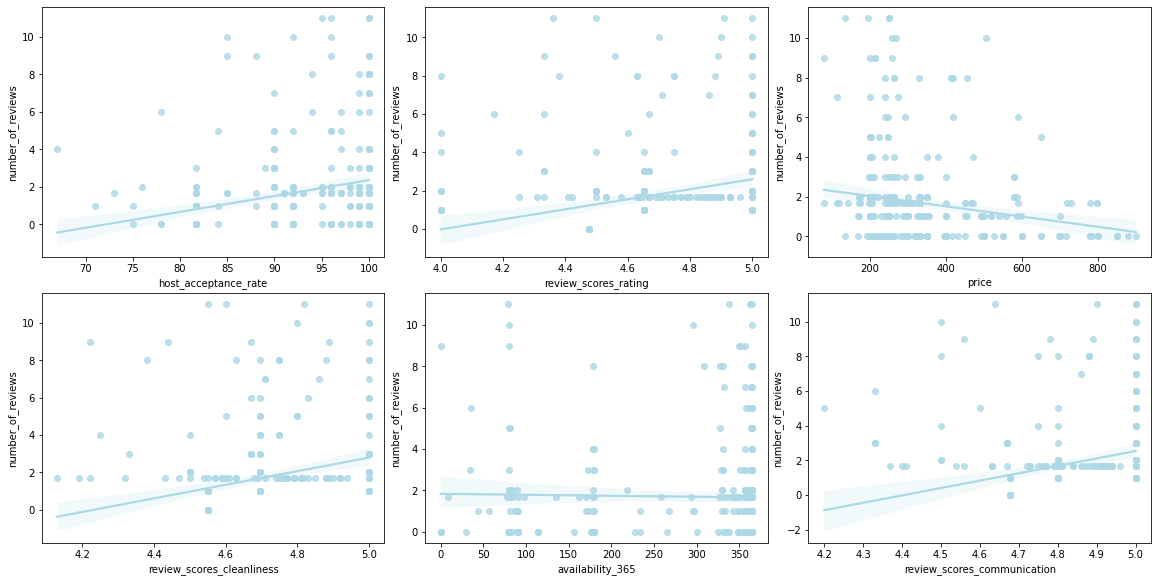

In [49]:
column_sels=['host_acceptance_rate','review_scores_rating', 'price', 'review_scores_cleanliness', 'availability_365','review_scores_communication']
x=SR.loc[:,column_sels]#variables explicativas

y=SR['number_of_reviews']#target, variable dependiente

fig, axs=plt.subplots(ncols=3,nrows=2,figsize=(16,8))
axs=axs.flatten()
for i, k in enumerate(column_sels):
  sns.regplot(x=x[k],y=y,data=SR,ax=axs[i],color='lightblue')
  plt.tight_layout(pad=0.4)

In [50]:
corr=SR.corrwith(SR['number_of_reviews'])
corr

host_acceptance_rate           0.264243
review_scores_rating           0.284745
price                         -0.174675
review_scores_cleanliness      0.301884
availability_365              -0.022350
review_scores_communication    0.299565
number_of_reviews              1.000000
dtype: float64

In [51]:
#COEFICIENTE DE DETERMINACIÓN R^2
coef_deter=pow(corr,2)
coef_deter

host_acceptance_rate           0.069824
review_scores_rating           0.081080
price                          0.030511
review_scores_cleanliness      0.091134
availability_365               0.000500
review_scores_communication    0.089739
number_of_reviews              1.000000
dtype: float64

**Selección de mejor modelo considerando el coeficiente de correlación**

---
HABITACIÓN COMPARTIDA (SR)
---
No. of reviews vs. Host_acceptance_rate


In [52]:
model=LinearRegression()
type(model)
Vars_Indep=SR[['host_acceptance_rate']]
Var_Dep=SR['number_of_reviews']
model.fit(X=Vars_Indep,y=Var_Dep)
y_pred=model.predict(X=SR[['host_acceptance_rate']])
y_pred

array([ 0.80723657,  0.80723657,  2.10725449,  1.34530477,  2.36123773,
        2.36123773,  1.68493151,  1.68493151,  1.59928801,  1.34530477,
        0.80723657,  1.68493151,  1.76861017,  1.76861017,  1.68493151,
        0.80723657,  0.80723657,  1.68493151,  1.68493151,  0.80723657,
        0.80723657,  2.36123773,  2.36123773,  1.68493151,  0.80723657,
        1.68493151,  2.36123773,  1.34530477,  1.68493151,  0.80723657,
        2.02259341,  1.68493151,  1.68493151,  2.02259341,  1.68493151,
        0.80723657,  1.68493151,  0.80723657,  0.80723657,  2.36123773,
        1.68493151,  0.80723657,  2.36123773,  2.36123773,  0.80723657,
        1.68493151,  0.80723657,  1.68493151,  0.80723657,  0.80723657,
        0.80723657,  0.80723657,  2.36123773,  2.36123773,  0.80723657,
        2.36123773,  1.68493151,  2.36123773,  0.80723657,  0.80723657,
        0.80723657, -0.43257791,  2.10725449,  1.68493151,  2.36123773,
        2.36123773,  2.36123773,  2.36123773,  2.36123773,  0.80

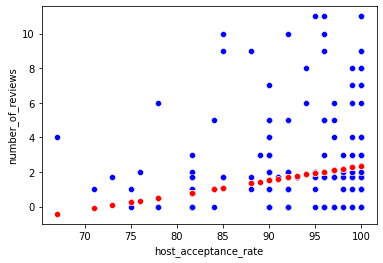

In [53]:
real=sns.scatterplot(x='host_acceptance_rate',y='number_of_reviews', color="blue",data=SR)
pred=sns.scatterplot(x='host_acceptance_rate',y=y_pred,color='red',data=SR)